# Escalamiento de datos numéricos

### Transformaciones lineales

In [4]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.2 MB 7.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/9.2 MB 8.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.2 MB 7.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.2 MB 8.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.5/9.2 MB 7.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/9.2 MB 7.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/9.2 MB 7.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.7/9.2 MB 7.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.2 MB 7.5 MB/s eta 0:00:01
   -------------- ---

In [1]:
# Medir el tiempo de ejecucion de los modelos
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# Para descargar dataset y realizar una regresion lineal
from sklearn import datasets, linear_model

#Se carga un dataset gracias a la libreria sklearn
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

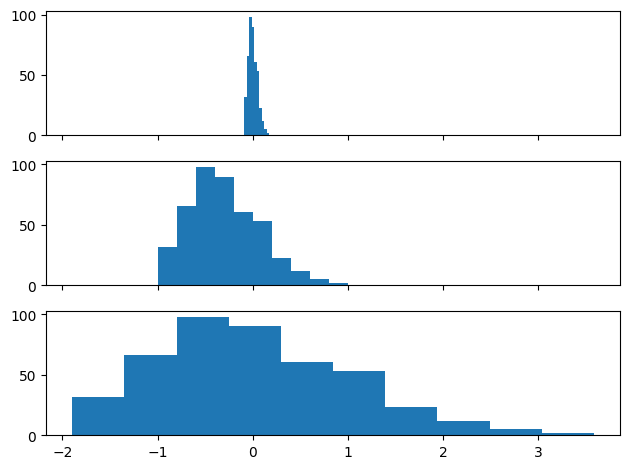

In [9]:
# Reglas de escalamiento
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
# Formula de escalamiento max-min
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

# sharex permite respetar la escala del eje x
fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [7]:
# modelos para entrenamiento, para comparar los tiempos de ejecucion con los datos originales y dos metodos de escalados
# En si son funciones que realizan regresiones lineales
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [10]:
#El numero 100 hace referencia a que se ejecuta 100 veces
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
z_scaled_time = timeit.timeit(train_z_scaled, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.11139540000294801 
trainning time for scaled data : 0.061625000002095476
trainning time for z_scaled data : 0.048780299999634735


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [ ]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

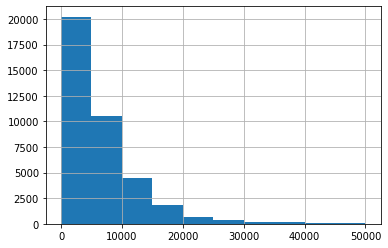

In [ ]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

<AxesSubplot:>

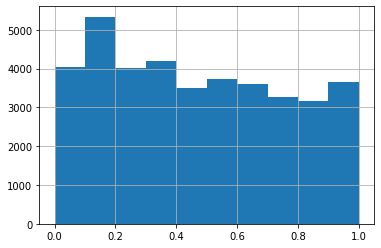

In [ ]:
#Tangente hiperbolica
# el p sirve para ir calibrando la transformacion
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f569948-e9a8-454f-8f4d-a27aa1610a87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>